In [ ]:
import torch
print(torch.cuda.get_device_properties(0))

_CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
from google.colab import drive
drive.mount('/drive' , force_remount = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers, losses
import cv2


#===============================================================================
# Prepare data

from tensorflow.keras.datasets import mnist
import numpy as np

(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train[0:20000]
x_test = x_test[0:5000]


X_train=[]
for i in range(0,len(x_train)):
    X_train.append(cv2.resize(x_train[i],(64,64)))
   
X_test = []
for i in range(0,len(x_test)):
    X_test.append(cv2.resize(x_test[i],(64,64)))
    

X_train , X_test = np.array(X_train), np.array(X_test)
print(X_train.shape , X_test.shape)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 64, 64, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 64, 64, 1))  # adapt this if using `channels_first` image data format

#===============================================================================



11501568/11490434 [==============================] - 0s 0us/step
(20000, 64, 64) (5000, 64, 64)


In [ ]:
# Create Layers + Model

input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format
# Block 1
c1= Conv2D(32 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(input_img)
c1 = Conv2D(32 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c1)
# c1 = Conv2D(32 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c1)
c1 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(c1)
# B1 = BatchNormalization()(c3)
M1= MaxPooling2D((2,2))(c1)


# Block 2
c2= Conv2D(64 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(M1)
c2 = Conv2D(64 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c2)
# c2 = Conv2D(64 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c2)
c2 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(c2)
# B2 = BatchNormalization()(c6)
M2= MaxPooling2D((2,2))(c2)


# Block 3
c3= Conv2D(128 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(M2)
c3 = Conv2D(128 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c3)
# B3 = BatchNormalization()(c8)
c3 = Conv2D(128, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c3)
# c3 = Conv2D(128 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c3)
c3 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(c3)
# B4 = BatchNormalization()(c10)
M3= MaxPooling2D((2,2))(c3)


# Block 4
c4= Conv2D(256 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(M3)
c4 = Conv2D(256 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c4)
# B5 = BatchNormalization()(c12)
c4 = Conv2D(256, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c4)
c4 = Conv2D(256 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c4)
# c4 = Conv2D(256 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(c4)
c4 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(c4)
# B6 = BatchNormalization()(c15)
M4 = MaxPooling2D((2,2))(c4)
encoded = M4


# Expansion
# Block 1
up1 =UpSampling2D((2,2))(encoded)
# conv_1 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'GlorotUniform')(up1)
conv_1 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(up1)
conv_1 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'GlorotUniform')(conv_1)
# conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'GlorotUniform')(conv_1)
conv_1 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'GlorotUniform')(conv_1)
conv_1 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'GlorotUniform')(conv_1)
# bn_1 = BatchNormalization()(conv_1)

# Block 2
up2 = UpSampling2D((2,2))(conv_1)
# conv_2 = Conv2D(128, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(up2)
conv_2 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(up2)
conv_2 = Conv2D(128, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_2)
# conv_2 = BatchNormalization()(conv_2)
conv_2 = Conv2D(128, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_2)
conv_2 = Conv2D(128, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_2)
# bn_2 = BatchNormalization()(conv_2)

# Block 3
up3 = UpSampling2D((2,2))(conv_2)
# conv_3 = Conv2D(64 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(up3)
conv_3 =DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(up3) 
conv_3 = Conv2D(64 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_3)
# conv_3 = BatchNormalization()(conv_3)
conv_3 = Conv2D(64, (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_3)
# bn_3 = BatchNormalization()(conv_3)


up4 = UpSampling2D((2,2))(conv_3)

# conv_4 = Conv2D(32 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(up4)
conv_4 = DepthwiseConv2D((3,3) , activation='relu' , kernel_initializer='GlorotUniform' , padding='same')(up4)
conv_4 = Conv2D(32 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_4)
conv_4 = Conv2D(32 , (3,3) , activation='relu' ,kernel_initializer='GlorotUniform' , padding='same')(conv_4)



decoded = Conv2D(1, 1, activation = 'sigmoid')(conv_4)
# /////////////////////////////
autoencoder = Model(input_img , decoded)
autoencoder.compile(optimizer=optimizers.RMSprop(lr =1e-4), loss=losses.binary_crossentropy)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 depthwise_conv2d (Depthwise  (None, 64, 64, 32)       320       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


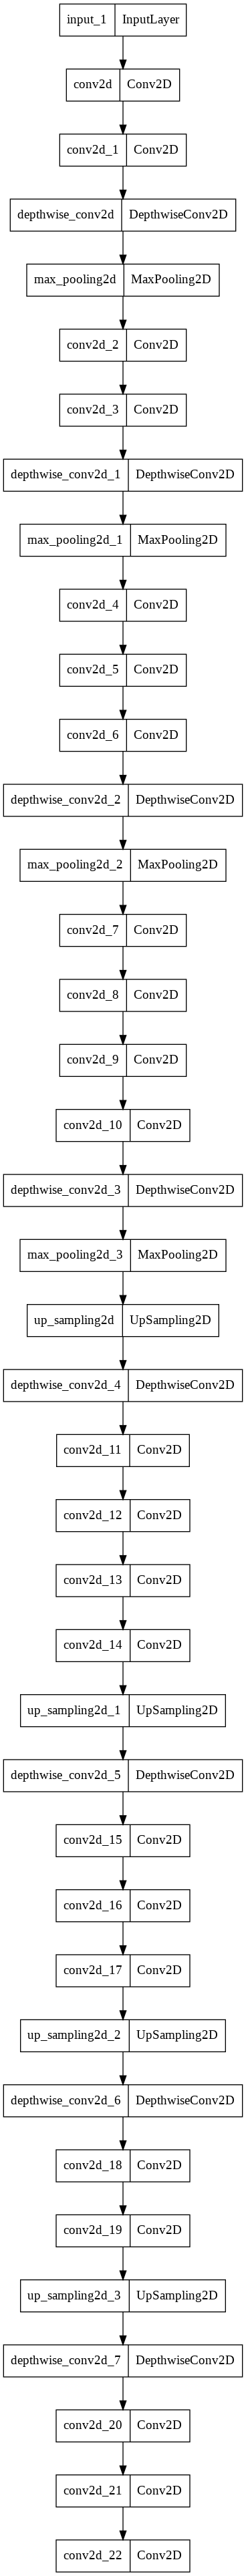

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder , "/content/autoencoder.png")

In [ ]:
# from tensorflow.keras.applications import EfficientNetB0
# autoencoder_eff = EfficientNetB0(include_top=False , input_shape=(64,64,3))

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
autoencoder.summary()

In [ ]:
#===============================================================================
# Train the Model

autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

#===============================================================================
# Predict + Visualization

import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(X_test)

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/200
157/157 [==============================] - 101s 545ms/step - loss: 0.4148 - val_loss: 0.2828
Epoch 2/200
157/157 [==============================] - 85s 540ms/step - loss: 0.2745 - val_loss: 0.2684
Epoch 3/200
 75/157 [=============>................] - ETA: 41s - loss: 0.2708

KeyboardInterrupt: ignored

In [ ]:
from skimage.color import rgb2gray
import scipy
from skimage import filters
from scipy import ndimage
import glob

# read the images
image_file_path = '/content/Cracks/'
image_file = glob.glob(image_file_path +'*.PNG')+glob.glob(image_file_path +'*.jpg')
image_file.sort()
X= []
x =[]
for img in image_file:
    image = cv2.imread(img)
    image = cv2.resize(image ,(64,64))
    image = rgb2gray(image)
    image = cv2.normalize(image.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    filt_x = ndimage.sobel(image , axis =0) # horizontal
    filt_y =  ndimage.sobel(image , axis =1) # vertical
    mag = np.hypot(filt_x , filt_y)
    mag = cv2.normalize(mag.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    for i in range(0,64):
      for j in range(0,64):
        if mag[i,j]<np.max(mag)*.2:
              mag[i,j]=0
    mag = mag.reshape(64,64,1)
    X.append(mag)
    x.append(image)
X , x = np.array(X) , np.array(x)
print(X.shape)



decoded_imgs = autoencoder.predict(X)

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
ndimage.sobel()

In [ ]:
X_train

1.0

In [ ]:
from skimage.color import rgb2gray
from skimage import filters
from scipy import ndimage
import matplotlib.pyplot as plt

I = cv2.imread('/drive/My Drive/Crack/00001.jpg')
I = cv2.resize(I ,(64,64))
I = rgb2gray(I)
I = cv2.normalize(I.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)
filt_x = ndimage.sobel(I , axis =0) # horizontal
filt_y =  ndimage.sobel(I , axis =1) # vertical
mag = np.hypot(filt_x , filt_y)
mag = cv2.normalize(mag.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)
for i in range(0,64):
  for j in range(0,64):
    if mag[i,j]<np.max(mag)*.2:


      mag[i,j]=0

In [ ]:
q = X_train.reshape(20000,64,64)

Text(0.5, 1.0, 'digit histogram')

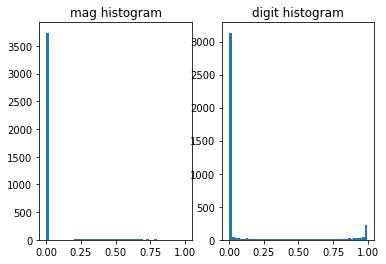

In [ ]:
fig,axes = plt.subplots(1,2)

axes[0].hist(mag.ravel() , bins =100)
axes[0].set_title('mag histogram')

axes[1].hist(Q.ravel() , bins =50)
axes[1].set_title('digit histogram')



In [ ]:
H =[]
for i in range(0,len(X_train)):

  hist_2d, x_edges, y_edges = np.histogram2d(mag.ravel(),q[i].ravel(),  bins=200)
  H.append(hist_2d)

3499.0

In [ ]:
 from math import log2
 def mutual_information(hgram):

   # Convert bins counts to probability values
   pxy = hgram / float(np.sum(hgram))
   px = np.sum(pxy, axis=1) # marginal for x over y
   py = np.sum(pxy, axis=0) # marginal for y over x
   px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
   nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
   return np.sum(pxy[nzs] * np.log2(pxy[nzs] / px_py[nzs]))

In [ ]:
I_X_Y =[]
for j in range(0,len(X_train)):

  I_X_Y.append(mutual_information(H[j]))

In [ ]:
np.max(I_X_Y)

0.515508552590445

In [ ]:
import skimage.measure    
entropy = skimage.measure.shannon_entropy(mag)

In [ ]:
entropy

1.1724942533205949